# Imports & Setup

In [2]:
pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ------------------------- -------------- 7.3/11.5 MB 50.2 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 40.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------  12.6/12.6 MB 61.6 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 55.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scipy

   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
   ------ --------------------------------- 7.1/43.6 MB 41.1 MB/s eta 0:00:01
   ------------------ --------------------- 20.7/43.6 MB 54.4 MB/s eta 0:00:01
   ------------------------------- -------- 34.1/43.6 MB 58.2 MB/s eta 0:00:01
   ---------------------------------------  43.5/43.6 MB 55.0 MB/s eta 0:00:01
   ---------------------------------------- 43.6/43.6 MB 49.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install matplotlib

  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------------------------------- -- 7.6/8.0 MB 41.5 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 38.5 MB/s eta 0:00:00
Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 39.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 50.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import os
import pandas as pd
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

def lowpass_filter(data, cutoff=6, fs=100, order=2):
    """
    Applies a low-pass Butterworth filter to the input data.
    :param data: 1D array of numerical values to filter
    :param cutoff: Cutoff frequency in Hz
    :param fs: Sampling frequency in Hz
    :param order: Order of the Butterworth filter
    :return: Filtered 1D array
    """
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Define Data Paths & Helper Functions

In [8]:
# External data folder path (adjust to your system)
DATA_BASE_PATH = r"C:\Users\saisr\Documents\Research Work\OpenCap\opencap-core\Examples\Data\e8ff6267-1ee9-44a1-b2ab-6247c61df201\MarkerData"

def preprocess_trc(input_file, output_file, cutoff=6, fs=100):
    """
    Reads a TRC file, applies a low-pass filter to each marker column,
    and saves a cleaned TRC file.
    """
    # Load TRC (assuming tab-delimited, skipping first 4 lines for header)
    df = pd.read_csv(input_file, sep='\t', skiprows=4)
    
    # Determine marker columns (this is an example; adjust indices as needed)
    marker_columns = df.columns[5:] 
    
    # Apply filtering to each marker column
    for col in marker_columns:
        df[col] = lowpass_filter(df[col].values, cutoff=cutoff, fs=fs)
    
    # Save the cleaned TRC file
    df.to_csv(output_file, sep='\t', index=False)
    print(f"Processed file saved: {output_file}")

# Run the Preprocessing for a Specific File

In [11]:
# Example usage
input_file = os.path.join(DATA_BASE_PATH, "AdAb.trc")
output_file = os.path.join(DATA_BASE_PATH, "AdAb_cleaned.trc")

preprocess_trc(input_file, output_file, cutoff=6, fs=100)

Processed file saved: C:\Users\saisr\Documents\Research Work\OpenCap\opencap-core\Examples\Data\e8ff6267-1ee9-44a1-b2ab-6247c61df201\MarkerData\AdAb_cleaned.trc


# Visual Check

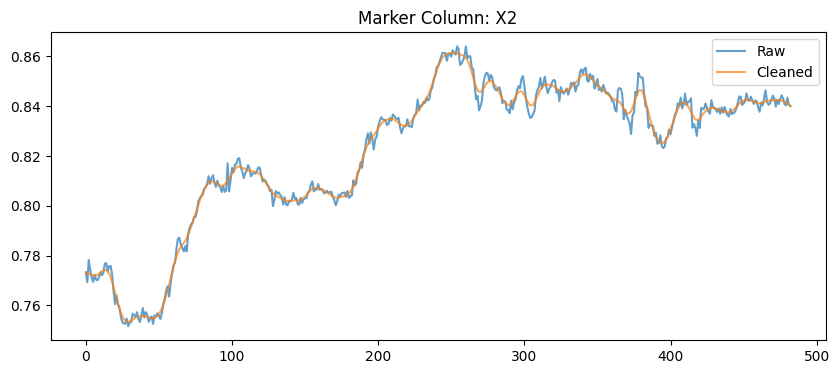

In [12]:
# Visualizing a single marker column
import numpy as np

# Reload the raw data
df_raw = pd.read_csv(input_file, sep='\t', skiprows=4)
marker_col = df_raw.columns[5]  # example marker
raw_data = df_raw[marker_col].values

# Reload the cleaned data
df_cleaned = pd.read_csv(output_file, sep='\t')
cleaned_data = df_cleaned[marker_col].values

plt.figure(figsize=(10, 4))
plt.plot(raw_data, label='Raw', alpha=0.7)
plt.plot(cleaned_data, label='Cleaned', alpha=0.7)
plt.legend()
plt.title(f"Marker Column: {marker_col}")
plt.show()